# Tugas Besar Sistem Cerdas (CBK2KAB3)
## Deteksi Potensi Kehancuran Ekosistem Mikro Laut akibat Mikroplastik

**Nama:** Yerick Rafaldy De Fretes  
**NIM:** 1303213113  
**Kelas:** IT-47-GABREM


## Pendahuluan

Polusi mikroplastik di laut sering kali luput dari perhatian publik meskipun berdampak besar terhadap ekosistem mikro seperti plankton dan bakteri laut. Studi ini bertujuan untuk memprediksi kemungkinan kerusakan ekosistem mikro berdasarkan parameter lingkungan dan tingkat mikroplastik.


## Paparan Data

Dataset ini merupakan data sintetis yang disimulasikan berdasarkan data ilmiah seputar salinitas, suhu, pH, konsentrasi mikroplastik, dan densitas plankton laut.

Mari kita muat dan eksplorasi data:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset_mikroplastik_ekosistem.csv")
df.head()

,ID,Lokasi,Salinitas (ppt),Suhu (°C),pH,Konsentrasi Mikroplastik (ppm),Densitas Plankton (cells/ml),Kerusakan Ekosistem
0,1,Zona C,33.73,28.42,8.21,0.342,4657,0
1,2,Zona D,32.73,27.89,7.91,0.261,5471,0
2,3,Zona A,34.33,26.28,8.12,0.388,3722,0
3,4,Zona C,36.28,29.32,7.83,0.229,5370,0
4,5,Zona C,35.32,24.84,7.98,0.431,6619,0


### Statistik Deskriptif dan Visualisasi Awal

In [2]:
df.describe()

,ID,Salinitas (ppt),Suhu (°C),pH,Konsentrasi Mikroplastik (ppm),Densitas Plankton (cells/ml),Kerusakan Ekosistem
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,34.989860,27.217220,8.113100,0.29944,5016.032000,0.128000
std,144.481833,1.512594,1.974694,0.199505,0.14580,775.889794,0.334424
min,1.000000,30.140000,21.210000,7.520000,-0.15300,2891.000000,0.000000
25%,125.750000,33.937500,25.890000,7.977500,0.20700,4467.250000,0.000000
50%,250.500000,34.985000,27.295000,8.110000,0.29850,5030.500000,0.000000
75%,375.250000,35.980000,28.475000,8.240000,0.39625,5543.250000,0.000000
max,500.000000,40.780000,32.260000,8.740000,0.77100,7488.000000,1.000000


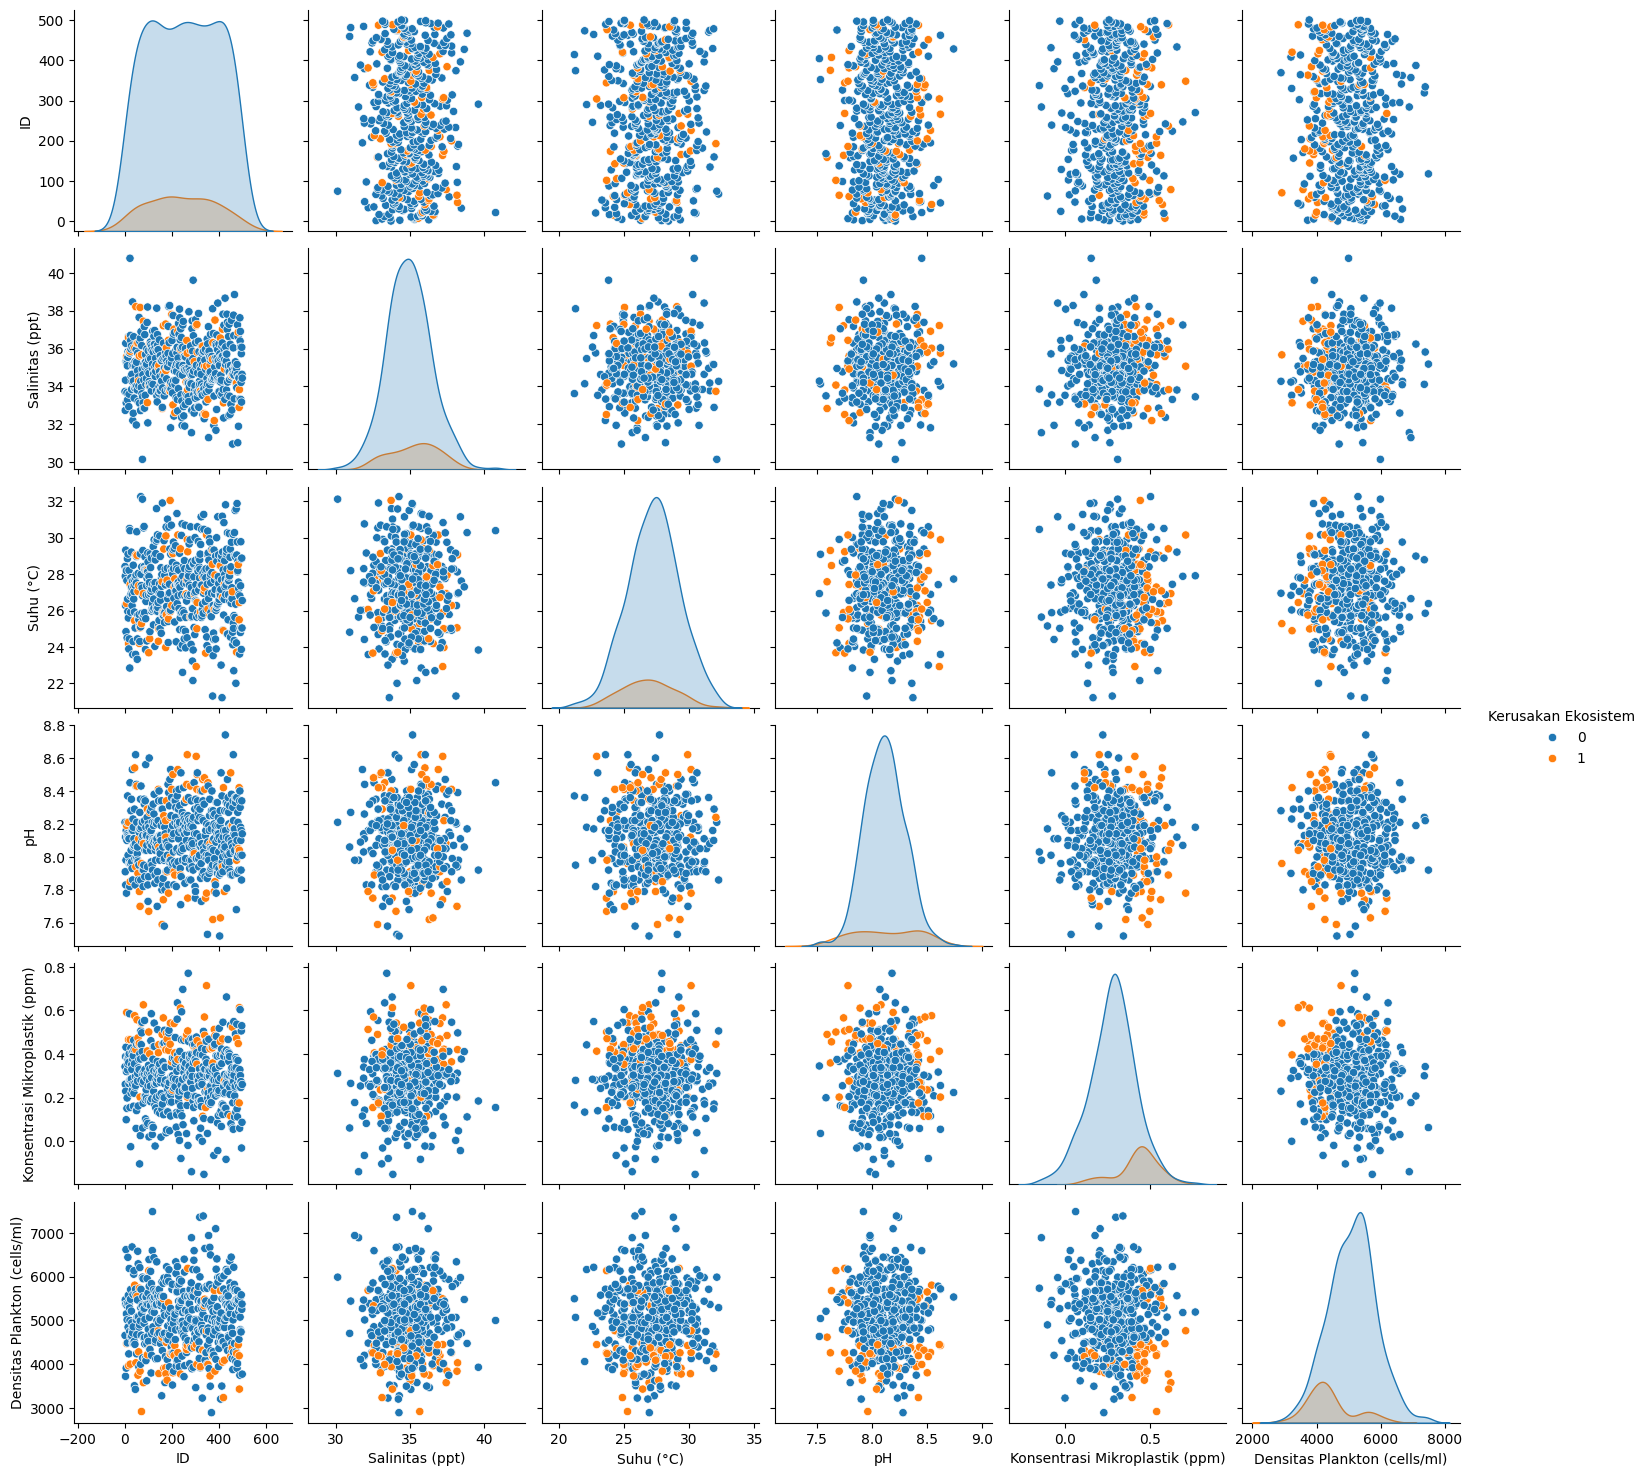

In [3]:
sns.pairplot(df, hue="Kerusakan Ekosistem", diag_kind="kde")
plt.show()

## Preprocessing Data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["ID", "Lokasi", "Kerusakan Ekosistem"])
y = df["Kerusakan Ekosistem"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


## Metode dan Eksperimen

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Model: Decision Tree
[[83  7]
 [ 2 83]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.92      0.98      0.95        85

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175


Model: Random Forest
[[88  2]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.98      0.99      0.98        85

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



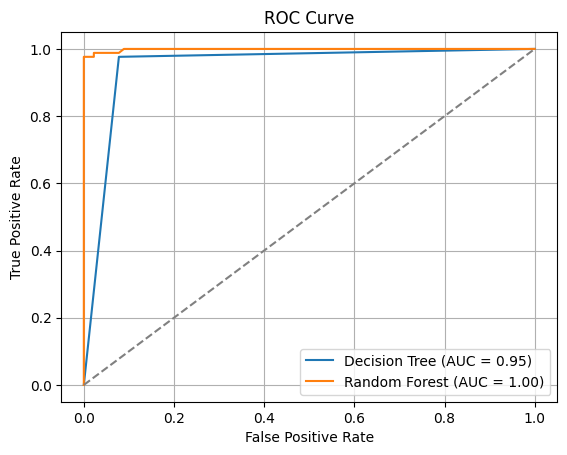

In [6]:
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


## Kesimpulan

Model Random Forest menunjukkan performa yang lebih baik dalam mendeteksi kerusakan ekosistem mikro laut berdasarkan parameter yang diberikan. Model ini cocok untuk kasus klasifikasi ekologis karena mampu menangani fitur kompleks dan non-linear.

